In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def preprocess_data(df, label_col="Label"):
    df.columns = df.columns.str.strip()
    if label_col not in df.columns:
        raise ValueError(f"Label column '{label_col}' not found in dataframe!")

    X = df.drop(label_col, axis=1, errors="ignore")
    y = df[label_col].values

    # numeric conversion + cleaning
    X = X.apply(pd.to_numeric, errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

def enn_test(X, y, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)

    mis_rate = np.mean(y_pred != y)
    per_class = {cls: np.mean(y_pred[y==cls] != cls) for cls in np.unique(y)}
    return mis_rate, per_class

BG_PORTS = {0, 53, 67, 68, 111, 123, 137, 161, 179, 389, 427, 520, 1723, 1900}
def port_test(df, label_col="Label", port_col="Destination Port"):
    if port_col not in df.columns:
        return {cls: np.nan for cls in df[label_col].unique()}  # skip if missing

    results = {}
    for cls, group in df.groupby(label_col):
        total = len(group)
        unclear = group[group[port_col].isin(BG_PORTS)]
        results[cls] = len(unclear)/total if total else 0
    return results


In [3]:
folder = "Awid_CSV" 
results = []

for subfolder in os.listdir(folder):
    subpath = os.path.join(folder, subfolder)
    if not os.path.isdir(subpath):
        continue

    for file in os.listdir(subpath):
        if not file.lower().endswith(".csv"):
            continue

        filepath = os.path.join(subpath, file)
        print(f"\n=== Processing {file} (folder: {subfolder}) ===")

        try:
            df = pd.read_csv(filepath)
            print("Shape:", df.shape)

            # Preprocess
            X_scaled, y = preprocess_data(df, label_col="Label")  # adjust if AWID uses "class"

            # ENN
            _, per_class = enn_test(X_scaled, y, k=5)

            # Port Test
            port_results = port_test(df, label_col="Label")

            # Store results
            for cls in np.unique(y):
                results.append({
                    "Folder": subfolder,
                    "File": file,
                    "Class": cls,
                    "ENN_misrate": per_class.get(cls, np.nan),
                    "PortTest_UGT_C": port_results.get(cls, np.nan),
                })

        except Exception as e:
            print(f" Error with {file}: {e}")


=== Processing Deauth_0.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,23,24,43,44,45,48,50,51,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,119,120,122,132,137,138,139,141,143,145,146,147,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_1.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,183,184,185,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_10.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_11.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_12.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_13.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,120,137,141,142,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_14.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_15.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,183,184,185,189,190,192,193,194,195,196,200,201,202,206,209,210,211,212,213,215,218,219,244,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_16.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,180,181,190,192,193,194,195,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_17.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_18.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,191,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_19.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,112,113,114,116,117,118,166,167,168,169,170,171,172,173,174,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_2.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,166,169,170,171,172,173,175,176,177,181,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_20.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_21.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_22.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,153,155,157,158,159,160,161,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_23.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_24.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_25.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_26.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_27.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_28.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,87,93,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_29.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (45,62,65,71,73,77,78,79,80,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_3.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,200,201,202,206,209,210,211,212,213,215,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_30.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_31.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,119,120,137,141,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_32.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,167,168,178,180,183,184,185,190,192,193,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,247,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (26472, 254)

=== Processing Deauth_4.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_5.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_6.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,196,197,201,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_7.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Deauth_8.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Deauth_9.csv (folder: 1.Deauth) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SQL_Injection_0.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,92,93,112,113,114,115,116,117,118,120,122,132,137,141,146,147,148,149,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,183,184,185,188,189,190,194,195,197,200,201,202,206,217,244,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_1.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,194,195,200,201,202,206,209,211,212,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_10.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,120,135,137,139,140,141,142,144,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_11.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,118,120,136,137,138,141,143,145,146,148,149,150,151,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_12.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,115,116,117,118,120,136,137,138,139,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_13.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_14.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,87,93,115,118,120,137,146,148,149,151,166,167,168,172,178,180,181,183,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_15.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_16.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,119,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_17.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,105,112,113,114,116,117,118,119,120,137,141,146,148,149,151,166,167,168,169,170,171,172,173,174,175,176,177,181,183,184,185,188,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing SQL_Injection_18.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,119,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SQL_Injection_19.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,119,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_2.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,174,175,176,177,181,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_20.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,120,137,141,142,146,148,149,151,166,168,172,181,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_21.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_22.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_23.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,191,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_24.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,87,92,93,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_25.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_26.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_27.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,166,196,197,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_28.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,168,172,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_29.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,172,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_3.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,120,136,137,138,141,142,143,145,146,147,148,149,150,151,166,169,170,171,172,173,175,176,177,181,189,190,193,194,195,196,197,200,201,202,203,204,205,206,210,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_30.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_31.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,169,170,171,172,173,175,176,177,181,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_32.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SQL_Injection_33.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,93,115,118,166,167,168,178,180,183,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_34.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,115,166,167,168,178,180,183,184,185,189,190,193,195,196,197,200,201,202,203,204,205,206,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_35.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,93,115,118,166,167,168,172,178,180,181,183,184,185,193,196,197,203,204,205,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_36.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,87,93,118,166,167,168,178,180,183,184,185,189,193,194,196,197,201,203,204,205,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_37.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,106,107,108,109,110,111,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_38.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,172,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_39.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_4.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (87,93,94,96,112,113,114,116,117,120,136,137,138,139,141,143,145,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_40.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,112,113,114,116,117,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_41.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_42.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,116,117,118,119,120,135,136,137,138,140,141,142,143,144,145,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SQL_Injection_43.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,119,120,135,136,137,138,140,141,142,143,144,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_44.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_45.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_46.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_47.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_48.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,87,93,94,96,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SQL_Injection_49.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_5.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,120,136,137,138,141,143,145,146,148,149,150,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_50.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_51.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (48365, 254)

=== Processing SQL_Injection_6.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,92,93,105,115,118,120,136,137,138,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,195,200,201,202,203,204,205,206,209,210,211,212,213,215,217,244,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_7.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,105,115,118,120,121,136,137,138,139,141,143,145,146,148,149,151,166,167,168,172,178,180,181,183,184,185,190,192,193,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_8.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,115,118,120,135,137,140,141,142,144,146,147,148,149,150,151,166,167,168,178,180,183,184,185,189,194,195,200,201,202,206,209,211,212,244,247,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SQL_Injection_9.csv (folder: 10.SQL_Injection) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,112,113,114,115,116,117,118,120,135,137,140,141,142,144,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_0.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,119,120,122,132,137,141,142,146,147,148,149,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_1.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,132,137,141,146,148,149,150,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_10.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_100.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,105,118,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_101.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,105,112,113,114,116,117,118,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,187,190,192,194,203,204,205,215,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_102.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,86,105,118,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,203,204,205,209,210,211,212,213,215,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_103.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_104.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_105.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,187,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_106.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_107.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,112,113,114,116,117,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,188,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_108.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_109.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,23,24,43,44,48,50,51,62,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_11.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing SSDP_110.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_111.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,172,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_112.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_113.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,153,158,159,160,161,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_114.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,122,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_115.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_116.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,153,158,159,160,161,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_117.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,118,122,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_118.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,23,24,43,44,48,50,51,62,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_119.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,244,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_12.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_120.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,219,244,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_121.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,120,137,141,146,148,149,151,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_122.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,120,137,138,141,143,145,146,148,149,151,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_123.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,141,146,148,149,151,153,158,159,160,161,167,178,180,183,190,192,193,194,197,209,210,211,212,213,217,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_124.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,138,139,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_125.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,138,139,141,143,145,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,195,196,197,200,201,202,203,204,205,206,215,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SSDP_126.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,87,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,120,137,139,141,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,244,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_127.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,120,137,138,141,143,145,146,148,149,151,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,244,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_128.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,120,137,138,143,145,146,148,149,151,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_129.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,87,105,120,137,146,148,149,151,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_13.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing SSDP_130.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,138,139,141,143,145,146,148,149,151,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_131.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,105,118,120,137,146,148,149,151,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_132.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_133.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,120,137,139,141,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_134.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,141,142,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_135.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,106,107,108,109,110,111,118,120,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_136.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,141,146,148,149,151,153,158,159,160,161,166,167,168,178,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_137.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,146,148,149,151,166,168,178,183,184,185,190,192,193,194,197,209,210,211,212,213,217,244,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_138.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,139,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,244,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_139.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,141,146,148,149,151,167,168,178,180,183,184,185,190,192,193,194,197,209,210,211,212,213,217,244,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_14.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,174,175,176,177,181,183,184,185,188,189,190,192,194,195,196,197,200,201,202,203,204,205,206,213,215,217,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SSDP_140.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,138,141,143,145,146,148,149,151,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_141.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,120,137,138,143,145,146,148,149,151,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_142.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,138,139,141,142,143,145,146,148,149,151,167,168,178,180,183,184,185,190,192,193,194,203,204,205,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_143.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,138,139,141,143,145,146,148,149,151,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_144.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,167,178,190,192,193,194,203,204,205,209,210,211,212,213,215,217,218,219,244,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_145.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,153,158,159,160,161,167,168,178,180,183,184,185,190,192,194,209,210,211,212,217,244,247,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_146.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,86,105,153,158,159,160,161,167,168,178,180,183,184,185,244,247,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_147.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,153,158,159,160,161,167,178,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,244,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_148.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_149.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_15.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,122,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_150.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_151.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,93,153,158,159,160,161,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,217,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_152.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,98,99,100,101,102,103,104,105,107,108,109,110,111,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_153.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,153,158,159,160,161,167,178,190,203,204,205,215,244,247,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_154.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,153,158,159,160,161,167,178,180,190,192,193,194,196,197,203,204,205,209,210,211,212,213,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_155.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,217,244,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_156.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,153,158,159,160,161,167,178,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_157.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,167,168,178,180,183,190,192,193,194,196,197,203,204,205,209,210,211,212,213,217,218,219,244,247,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_158.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,106,107,108,109,110,111,153,158,159,160,161,167,178,190,192,193,194,209,210,211,212,213,217,244,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_159.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,106,107,108,109,110,111,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,217,244,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_16.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,172,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_160.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,106,107,108,109,110,111,167,168,178,180,183,184,185,190,192,193,194,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_161.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,106,107,108,109,110,111,118,153,158,159,160,161,190,192,193,194,197,209,210,211,212,213,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_162.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,141,146,148,149,151,166,167,168,172,178,180,181,183,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (41523, 254)

=== Processing SSDP_17.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_18.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,45,62,65,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,153,155,157,158,159,160,161,162,163,164,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_19.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_2.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_20.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,172,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_21.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,194,196,197,203,204,205,215,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_22.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,194,195,196,197,200,201,202,203,204,205,206,213,215,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_23.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (34,58,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,172,178,180,181,183,184,185,189,190,193,195,196,197,200,201,202,203,204,205,206,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50004, 254)
 Error with SSDP_23.csv: Input contains NaN

=== Processing SSDP_24.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_25.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (34,58,71,73,77,78,79,80,82,84,85,86,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,122,166,167,168,172,178,180,181,183,184,185,189,192,194,196,197,203,204,205,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50016, 254)
 Error with SSDP_25.csv: Input contains NaN

=== Processing SSDP_26.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,119,141,142,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing SSDP_27.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,34,48,50,51,58,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,119,120,137,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50111, 254)
 Error with SSDP_27.csv: Input contains NaN

=== Processing SSDP_28.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,146,148,149,151,153,158,159,160,161,166,167,168,172,178,180,181,183,184,185,190,192,193,194,196,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_29.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,105,120,137,146,148,149,151,153,158,159,160,161,166,167,178,180,183,190,192,193,194,196,197,203,204,205,209,210,211,212,213,217,244,247,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_3.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_30.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,105,112,113,114,116,117,118,120,137,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_31.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,209,210,211,212,213,217,218,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_32.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,106,107,108,109,110,111,118,120,137,146,148,149,151,153,158,159,160,161,166,167,178,180,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_33.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,86,105,118,120,137,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,196,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_34.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,86,105,118,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_35.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_36.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,105,118,119,120,137,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_37.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,166,167,168,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_38.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,190,192,193,194,197,209,210,211,212,213,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_39.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,122,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_4.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49997, 254)

=== Processing SSDP_40.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,119,120,122,137,146,148,149,150,151,166,167,168,178,180,183,184,185,190,192,193,194,196,209,210,211,212,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_41.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,139,141,142,146,148,149,151,166,167,168,178,180,183,190,192,194,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_42.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,120,136,137,138,139,141,142,143,145,146,148,149,151,153,158,159,160,161,166,167,168,172,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_43.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,120,136,137,138,141,142,143,145,146,148,149,151,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,248,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_44.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,136,137,138,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_45.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,120,136,137,138,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_46.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,105,120,137,146,148,149,151,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_47.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,136,137,138,141,143,145,146,148,149,151,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_48.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,194,203,204,205,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_49.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,86,105,118,120,137,139,141,142,146,148,149,151,166,167,168,172,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_5.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_50.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,105,118,167,168,178,180,183,184,185,190,192,193,194,196,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_51.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,120,136,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_52.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,118,120,137,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_53.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,86,105,118,120,137,139,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_54.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,112,113,114,116,117,118,120,137,141,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_55.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,118,120,136,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_56.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,139,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_57.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,141,142,143,145,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_58.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,139,141,142,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,176,177,178,180,181,183,184,185,186,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_59.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,186,187,190,192,193,194,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_6.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_60.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,136,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,212,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_61.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,105,112,113,114,116,117,118,120,137,141,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_62.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_63.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,139,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,187,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_64.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,136,137,138,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_65.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,116,117,118,120,137,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,190,192,193,194,209,210,211,212,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_66.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,188,190,192,193,194,197,203,204,205,209,210,211,212,213,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_67.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,120,137,139,141,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,197,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_68.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,98,99,100,101,102,103,104,105,107,108,109,110,111,120,136,137,138,141,142,143,145,146,148,149,151,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_69.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,153,158,159,160,161,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,186,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_7.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_70.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,139,141,142,146,148,149,151,166,167,168,172,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_71.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,136,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_72.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,141,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_73.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,141,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_74.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,136,137,138,139,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_75.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,136,137,138,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,244,247,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_76.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,136,137,138,141,143,145,146,148,149,151,153,158,159,160,161,166,167,178,180,183,190,192,193,194,197,203,204,205,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_77.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,118,120,122,137,139,141,146,148,149,151,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_78.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,153,158,159,160,161,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_79.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,153,158,159,160,161,166,167,168,169,170,171,172,173,176,177,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_8.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,166,168,172,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)
 Error with SSDP_8.csv: Input contains NaN

=== Processing SSDP_80.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,166,167,168,178,180,183,184,185,190,192,193,194,203,204,205,209,210,211,212,213,215,217,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_81.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,172,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_82.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,166,167,178,180,190,192,193,194,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_83.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,153,158,159,160,161,167,168,178,180,183,190,192,193,194,197,203,204,205,209,210,211,212,213,217,218,219,247,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_84.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_85.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,209,210,211,212,213,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_86.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,86,105,118,153,158,159,160,161,166,167,178,180,183,190,192,193,194,197,203,204,205,209,210,211,212,213,217,247,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_87.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,153,158,159,160,161,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,190,192,193,194,197,203,204,205,209,210,211,212,213,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_88.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,166,167,168,172,178,180,181,183,184,185,192,193,194,197,209,210,211,212,213,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_89.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,118,153,158,159,160,161,166,167,168,172,178,180,181,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,217,218,219,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_9.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_90.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,166,167,168,172,178,180,181,183,184,185,194,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_91.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,166,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,218,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_92.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,153,158,159,160,161,166,167,168,178,180,183,184,185,190,203,204,205,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_93.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,86,105,118,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_94.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,153,158,159,160,161,166,167,168,169,170,171,172,173,176,177,178,180,181,183,184,185,186,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_95.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,190,192,193,194,203,204,205,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_96.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,166,167,168,178,180,183,184,185,197,217,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_97.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,172,178,180,181,183,184,185,190,192,209,210,211,212,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_98.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,196,203,204,205,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSDP_99.csv (folder: 11.SSDP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,105,118,153,158,159,160,161,167,168,178,180,183,184,185,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_0.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,119,120,122,132,137,138,141,142,143,145,146,147,148,149,151,153,155,157,158,159,160,161,162,163,164,166,169,170,171,172,173,175,176,177,181,186,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49997, 254)

=== Processing Evil_Twin_1.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,166,169,170,171,172,173,175,176,177,181,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_10.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_11.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,193,195,196,197,200,201,202,203,204,205,206,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_12.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_13.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_14.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_15.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,120,137,141,142,146,148,149,151,166,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_16.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,112,113,114,116,117,118,166,167,168,183,184,185,189,190,196,197,203,204,205,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_17.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_18.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_19.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,118,166,167,168,178,180,183,184,185,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_2.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,122,166,189,193,196,197,203,204,205,209,210,211,212,213,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_20.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_21.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_22.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,242,243,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_23.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,87,93,94,96,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_24.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_25.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_26.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_27.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_28.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,153,155,157,158,159,160,161,162,163,164,166,167,168,172,178,179,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_29.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,93,112,113,114,116,117,118,122,166,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_3.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,190,192,193,194,195,197,200,201,202,203,204,205,206,210,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_30.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,169,170,171,172,173,175,176,177,181,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_31.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_32.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,180,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_33.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,153,155,157,158,159,160,161,163,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_34.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,153,155,157,158,159,160,161,162,163,164,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_35.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_36.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,188,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_37.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_38.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_39.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,192,193,194,196,197,203,204,205,213,217,218,219,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_4.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,92,93,94,96,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_40.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_41.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_42.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_43.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_44.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_45.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,87,93,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_46.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_47.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,86,87,93,94,112,113,114,115,116,117,118,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,193,196,197,203,204,205,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_48.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,87,93,118,166,167,168,172,178,180,181,183,184,185,189,192,193,194,196,197,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_49.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_5.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_50.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,166,167,168,178,180,183,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_51.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_52.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,132,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_53.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,93,112,113,114,116,117,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_54.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,118,153,155,157,158,159,160,161,162,163,164,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_55.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_56.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (58,71,73,77,78,79,80,82,84,85,90,91,92,93,94,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50006, 254)
 Error with Evil_Twin_56.csv: Input contains NaN

=== Processing Evil_Twin_57.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (58,71,73,77,78,79,80,93,94,96,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50010, 254)
 Error with Evil_Twin_57.csv: Input contains NaN

=== Processing Evil_Twin_58.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_59.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,189,190,195,196,197,200,201,202,203,204,205,206,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_6.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,184,185,186,189,192,193,194,196,197,203,204,205,209,210,211,212,213,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_60.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,87,93,94,96,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_61.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,119,120,137,141,142,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_62.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,118,119,141,142,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_63.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,189,193,196,197,215,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_64.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,196,197,203,204,205,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_65.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,167,168,178,180,183,184,185,189,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_66.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,120,122,137,141,142,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_67.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,142,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_68.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_69.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_7.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_70.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_71.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Evil_Twin_72.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,184,185,189,193,196,197,203,204,205,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_73.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Evil_Twin_74.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_75.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,166,167,168,172,178,180,181,183,184,185,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (28728, 254)

=== Processing Evil_Twin_8.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Evil_Twin_9.csv (folder: 12.Evil_Twin) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_0.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,122,132,137,141,146,147,148,149,151,153,155,157,158,159,160,161,162,163,164,166,168,169,170,171,172,173,175,176,177,179,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_1.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,174,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Website_spoofing_10.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,194,196,197,203,204,205,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Website_spoofing_11.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_12.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_13.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_14.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,186,188,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_15.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_16.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_17.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,166,167,168,179,183,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Website_spoofing_18.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,169,170,171,172,173,175,176,177,179,181,184,185,186,189,190,195,196,197,200,201,202,203,204,205,206,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_19.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,179,181,183,184,185,189,193,195,196,197,200,201,202,203,204,205,206,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_2.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,169,170,171,172,173,174,175,176,177,179,181,186,187,189,192,193,194,196,197,203,204,205,209,210,211,212,213,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_20.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,120,137,141,142,146,148,149,151,166,167,168,178,179,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Website_spoofing_21.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_22.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,92,93,94,96,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,179,180,181,183,184,185,186,189,190,192,193,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_23.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,196,197,203,204,205,209,210,211,212,213,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Website_spoofing_24.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,183,184,185,189,192,193,194,196,203,204,205,209,210,211,212,213,215,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Website_spoofing_25.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,172,181,183,184,185,189,196,197,203,204,205,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_26.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_27.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Website_spoofing_28.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,115,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_29.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,93,94,96,112,113,114,116,117,166,167,168,169,170,171,172,173,175,176,177,178,179,180,181,183,184,185,186,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_3.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,179,181,183,184,185,186,196,197,203,204,205,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_30.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,167,168,178,180,183,184,185,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_31.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_32.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_33.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,178,180,183,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_34.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_35.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117,118,120,137,141,142,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,179,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_36.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (86,87,92,93,94,96,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_37.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_38.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (86,92,93,94,96,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_39.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (86,93,94,96,115,118,166,167,168,178,180,183,184,185,190,192,193,194,195,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Website_spoofing_4.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,93,112,113,114,116,117,168,169,170,171,172,173,175,176,177,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Website_spoofing_40.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_41.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_42.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,189,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_43.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,187,188,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_44.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_45.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_46.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,167,168,178,180,183,184,185,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_47.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,191,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_48.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,179,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_49.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_5.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,179,180,183,184,185,192,194,196,197,203,204,205,217,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_50.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,122,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Website_spoofing_51.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_52.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,81,82,83,84,85,86,90,91,92,93,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_53.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,178,180,183,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,244,247,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (18583, 254)

=== Processing Website_spoofing_6.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_7.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_8.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (87,93,94,96,112,113,114,116,117,118,166,184,185,189,193,196,197,203,204,205,209,210,211,212,213,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Website_spoofing_9.csv (folder: 13.Website_spoofing) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_0.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,119,120,122,132,137,138,139,141,142,143,145,146,148,149,151,153,155,157,158,159,160,161,162,163,164,166,168,183,184,185,189,190,192,194,195,197,200,201,202,203,204,205,206,209,210,211,212,215,217,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_1.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,184,185,189,190,192,193,194,195,200,201,202,203,204,205,206,209,210,211,212,213,215,217,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_10.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_11.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,146,148,149,151,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_12.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_13.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_14.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_15.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_16.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,192,193,194,196,197,209,210,211,212,213,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_17.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,169,170,171,172,173,174,175,176,177,181,188,189,192,194,196,197,203,204,205,211,213,215,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_18.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_19.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_2.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_20.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,122,166,168,169,170,171,172,173,175,176,177,181,183,184,185,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_21.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_22.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_23.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,112,113,114,116,117,118,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_24.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_25.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_26.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_27.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_28.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,93,94,96,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_29.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,119,120,135,137,140,141,142,144,146,147,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Disas_3.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Disas_30.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_31.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_32.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_33.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (70,71,73,77,78,79,80,81,82,83,84,85,86,90,91,92,93,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,115,119,120,135,137,140,141,142,144,146,148,149,151,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_34.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,115,119,120,135,137,140,144,146,148,149,151,167,168,178,180,183,184,185,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_35.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,119,120,135,137,140,144,146,148,149,151,167,178,180,194,209,211,212,244,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_36.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,119,120,135,137,140,141,142,144,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_37.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,81,82,83,84,85,86,90,91,92,93,94,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,122,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,191,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_38.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (70,71,73,77,78,79,80,81,82,83,84,85,90,91,92,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,115,167,178,180,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_39.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (81,83,86,97,105,106,115,167,178,180,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_4.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,115,116,117,118,120,135,137,140,141,144,146,147,148,149,150,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_40.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,70,71,73,77,78,79,80,81,82,83,84,85,86,90,91,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,115,153,155,157,158,159,160,161,162,163,164,167,168,178,180,183,190,194,195,200,201,202,206,244,247,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (13719, 254)

=== Processing Disas_5.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,116,117,118,120,135,137,140,141,142,144,146,148,149,151,166,169,170,171,172,173,175,176,177,181,189,192,193,194,197,209,210,211,212,213,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_6.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,166,167,172,180,181,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_7.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_8.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,112,113,114,116,117,118,120,137,146,148,149,151,166,168,172,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Disas_9.csv (folder: 2.Disas) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_0.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,87,92,93,94,96,112,113,114,116,117,118,119,120,122,132,137,138,141,142,143,145,146,147,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_1.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,118,166,184,189,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_10.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_11.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,119,120,137,141,142,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_12.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (92,93,115,118,119,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_13.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,119,120,137,141,142,146,148,149,151,166,168,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_14.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,94,96,118,119,120,137,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_15.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,118,119,120,137,141,142,146,148,149,151,168,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing (Re)Assoc_16.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_17.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,122,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_18.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_19.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,120,137,141,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_2.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_20.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,92,93,94,96,112,113,114,116,117,118,120,121,137,138,139,141,143,145,146,148,149,151,166,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_21.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,138,141,143,145,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_22.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,120,137,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_23.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (58,71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,122,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50003, 254)
 Error with (Re)Assoc_23.csv: Input contains NaN

=== Processing (Re)Assoc_24.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_25.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_26.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing (Re)Assoc_27.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_28.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_29.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,132,166,167,168,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing (Re)Assoc_3.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,183,184,185,189,190,192,193,194,195,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_30.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_31.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,119,120,137,141,142,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_32.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,118,119,139,141,142,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_33.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,146,148,149,151,166,169,170,171,172,173,175,176,177,181,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_34.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,23,24,43,48,62,65,71,73,77,78,79,80,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_35.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_36.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (43939, 254)

=== Processing (Re)Assoc_4.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_5.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_6.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_7.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_8.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,192,193,194,196,197,201,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing (Re)Assoc_9.csv (folder: 3.(Re)Assoc) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,147,148,149,150,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_0.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,132,136,137,138,139,141,142,143,144,145,146,147,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_1.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_10.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,119,135,136,138,140,142,143,144,145,147,150,166,167,168,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_11.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,119,135,136,138,140,143,144,145,166,167,168,183,184,185,189,190,192,194,195,200,201,202,203,204,205,206,215,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_12.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,92,93,94,96,112,113,114,116,117,118,119,135,136,138,140,143,144,145,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_13.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,136,138,142,143,145,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_14.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_15.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,112,113,114,115,116,117,118,119,120,135,137,140,141,142,144,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_16.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,115,118,120,135,137,140,141,142,144,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,219,247,248,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_17.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,120,135,136,137,138,139,140,141,142,143,144,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_18.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_19.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,218,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_2.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,141,142,143,145,146,147,148,149,150,151,166,169,170,171,172,173,174,175,176,177,181,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing RogueAP_20.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,119,120,135,136,137,138,140,141,142,143,144,145,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_21.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,115,116,117,118,119,120,135,136,137,138,140,141,142,143,144,145,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_22.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,190,192,193,194,195,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_23.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,190,192,194,195,197,200,201,202,203,204,205,206,209,211,212,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_24.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,119,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_25.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,119,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,200,201,202,203,204,205,206,209,210,211,212,213,215,217,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_26.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_27.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_28.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,122,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_29.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,122,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,209,211,212,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_3.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,119,120,136,137,138,139,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_30.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,118,132,166,167,168,178,180,183,184,185,189,190,192,194,195,196,197,200,201,202,203,204,205,206,213,215,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_31.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,120,136,137,138,141,142,143,145,146,148,149,151,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_32.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,93,94,96,112,113,114,116,117,118,119,120,122,136,137,138,141,142,143,145,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_33.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing RogueAP_34.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_35.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49997, 254)

=== Processing RogueAP_36.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,192,194,196,197,203,204,205,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing RogueAP_37.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,188,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_38.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_39.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,190,192,193,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (23193, 254)

=== Processing RogueAP_4.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,119,120,136,137,138,139,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,200,201,202,206,209,210,211,212,213,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_5.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,120,136,137,138,139,141,142,143,145,146,147,148,149,150,151,166,167,168,178,180,183,184,185,189,195,197,200,201,202,206,209,211,212,213,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_6.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,141,143,145,146,148,149,151,166,167,168,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_7.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,136,137,138,139,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_8.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,119,120,136,137,138,141,142,143,145,146,148,149,150,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing RogueAP_9.csv (folder: 4.Rogue_AP) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,119,150,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_0.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,121,122,132,136,137,138,141,143,145,146,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,208,209,210,211,212,213,217,244,247,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_1.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,115,120,137,146,148,149,151,167,168,178,180,183,184,185,189,194,197,209,210,211,212,217,244,247,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_10.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,193,194,196,197,203,204,205,209,210,211,212,213,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_11.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Krack_12.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,105,112,113,114,116,117,118,120,122,137,141,146,148,149,151,166,167,168,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Krack_13.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,105,112,113,114,115,116,117,118,120,122,137,141,146,148,149,151,166,167,168,178,180,183,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_14.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,122,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_15.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,184,185,189,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_16.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,94,96,112,113,114,116,117,118,166,169,170,171,172,173,174,175,176,177,181,184,185,187,188,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Krack_17.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,112,113,114,116,117,118,166,167,168,169,170,171,172,173,174,175,176,177,181,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Krack_18.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,96,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_19.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,119,120,135,137,140,141,142,144,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_2.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,120,122,132,137,138,141,142,143,145,146,147,148,149,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,187,188,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_20.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,94,96,105,112,113,114,116,117,118,119,120,135,137,140,144,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_21.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,119,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_22.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,94,96,112,113,114,115,116,117,118,119,120,121,135,137,138,140,141,142,143,144,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_23.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,166,169,170,171,172,173,174,175,176,177,181,184,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_24.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,94,96,112,113,114,116,117,118,120,137,141,146,148,149,151,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,188,190,192,193,194,195,196,197,200,201,202,203,204,205,206,208,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_25.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,24,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_26.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (24,87,118,166,190,194,195,200,201,202,203,204,205,206,209,211,212,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_27.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,24,43,44,45,62,65,72,74,75,76,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,153,155,157,158,159,160,161,163,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_28.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,24,43,44,45,62,65,72,74,75,76,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,153,155,157,158,159,160,161,163,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (38493, 254)

=== Processing Krack_3.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,186,187,188,189,190,191,192,193,194,196,197,203,204,205,207,208,209,210,211,212,213,215,216,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_4.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,122,166,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,192,193,194,196,197,203,204,205,209,210,211,212,213,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_5.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,122,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_6.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,135,137,140,141,142,144,146,147,148,149,150,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_7.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,190,191,192,193,194,195,196,197,200,201,202,203,204,205,206,207,208,209,210,211,212,213,215,216,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_8.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,120,122,132,136,137,138,139,141,142,143,145,146,147,148,149,150,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Krack_9.csv (folder: 5.Krack) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (48,50,51,71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_0.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,120,122,132,137,141,146,147,148,149,151,153,155,157,158,159,160,161,162,163,164,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_1.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,166,189,192,194,196,197,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Kr00k_10.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,119,120,136,137,138,141,142,143,145,146,148,149,150,151,166,167,168,178,180,183,184,185,189,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_11.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,115,120,136,137,138,141,142,143,145,146,148,149,151,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_12.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,115,119,136,138,143,145,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_13.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_14.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,119,120,136,137,138,139,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_15.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,147,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_16.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,120,137,146,148,149,151,166,189,192,194,196,197,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_17.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,87,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,120,137,148,149,166,172,181,195,196,197,200,201,202,203,204,205,206,213,215,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_18.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,87,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_19.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,120,137,141,142,146,148,149,151,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_2.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,112,113,114,116,117,118,122,166,169,170,171,172,173,175,176,177,181,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_20.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,119,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_21.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_22.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,112,113,114,116,117,118,120,137,138,141,143,145,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_23.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,120,137,146,148,149,151,166,168,169,170,171,172,173,175,176,177,181,183,184,185,189,192,194,195,196,197,200,201,202,203,204,205,206,215,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Kr00k_24.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_25.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,172,181,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_26.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,138,141,143,145,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Kr00k_27.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,119,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Kr00k_28.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,119,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_29.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,115,118,119,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_3.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,120,122,136,137,138,139,141,142,143,145,146,148,149,150,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_30.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,192,193,194,195,200,201,202,206,209,210,211,212,247,248,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_31.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_32.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,23,24,43,44,45,48,50,51,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_33.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,23,24,43,44,45,48,50,51,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,122,153,155,157,158,159,160,161,162,163,164,166,168,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_34.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,120,137,141,142,146,148,149,151,153,155,157,158,159,160,161,162,163,164,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_35.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,86,105,106,115,118,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_36.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,86,105,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Kr00k_37.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_38.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,98,99,100,101,102,103,104,105,106,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_39.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,97,105,106,112,113,114,116,117,118,166,167,168,178,180,183,184,185,189,195,200,201,202,206,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_4.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,136,137,138,141,142,143,145,146,148,149,151,166,169,170,171,172,173,175,176,177,181,186,189,190,191,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Kr00k_40.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,195,197,200,201,202,206,209,210,211,212,217,218,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_41.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,23,24,43,44,45,48,50,51,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_42.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_43.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,23,24,43,44,45,48,50,51,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,122,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_44.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,169,170,171,172,173,175,176,177,181,186,189,195,196,197,200,201,202,203,204,205,206,215,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_45.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_46.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Kr00k_47.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_48.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_49.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,122,153,155,157,158,159,160,161,162,163,164,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_5.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,112,113,114,116,117,120,137,141,146,148,149,151,166,168,169,170,171,172,173,174,175,176,177,181,183,184,185,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,242,243,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Kr00k_50.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing Kr00k_51.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_52.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,122,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Kr00k_53.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_54.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,190,195,200,201,202,203,204,205,206,215,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_55.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,86,93,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_56.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_57.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,122,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,186,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49999, 254)

=== Processing Kr00k_58.csv (folder: 6.Kr00k) ===
Shape: (458, 254)

=== Processing Kr00k_6.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,94,96,118,119,120,137,141,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,242,243,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_7.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,94,96,105,120,136,137,138,139,141,142,143,145,146,148,149,151,167,168,178,180,183,184,185,190,192,193,194,195,200,201,202,203,204,205,206,209,210,211,212,213,215,218,219,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_8.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,94,96,105,118,120,137,141,142,146,148,149,151,166,167,168,172,178,180,181,183,184,185,190,192,193,194,195,196,200,201,202,206,209,210,211,212,213,215,217,218,219,247,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing Kr00k_9.csv (folder: 6.Kr00k) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,119,120,137,141,146,148,149,151,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_0.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,132,137,138,141,142,143,145,146,147,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,179,180,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_1.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,166,172,181,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SSH_10.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_11.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,166,167,168,183,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_12.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,86,93,112,113,114,115,116,117,118,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_13.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,166,167,168,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SSH_14.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,118,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_15.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,122,136,137,138,139,141,142,143,145,146,148,149,150,151,166,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_16.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116,117,118,166,168,169,170,171,172,173,175,176,177,181,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_17.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,167,168,178,180,183,184,185,189,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (49998, 254)

=== Processing SSH_18.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,120,122,136,137,138,139,141,142,143,145,146,148,149,150,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_19.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,122,137,139,141,142,146,148,149,151,166,168,169,170,171,172,173,175,176,177,181,183,184,185,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_2.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,137,141,146,148,149,151,166,169,170,171,172,173,175,176,177,181,189,192,194,196,197,203,204,205,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_20.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (50000, 254)

=== Processing SSH_21.csv (folder: 7.SSH) ===


C:\Users\tanbe\AppData\Local\Temp\ipykernel_24432\3443088727.py:17: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,189,190,192,193,194,195,196,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Shape: (28334, 254)
 Error with SSH_21.csv: Input contains NaN


In [4]:
summary_df = pd.DataFrame(results)
print("\n=== Summary Results ===")
print(summary_df.head(20))

summary_df.to_csv("AWID_ENN_PortTest_Summary.csv", index=False, encoding="utf-8")
print("Saved AWID_ENN_PortTest_Summary.csv")



=== Summary Results ===
      Folder           File   Class  ENN_misrate  PortTest_UGT_C
0   1.Deauth   Deauth_0.csv  Normal     0.000000             NaN
1   1.Deauth   Deauth_1.csv  Normal     0.000000             NaN
2   1.Deauth  Deauth_10.csv  Normal     0.000000             NaN
3   1.Deauth  Deauth_11.csv  Normal     0.000000             NaN
4   1.Deauth  Deauth_12.csv  Normal     0.000000             NaN
5   1.Deauth  Deauth_13.csv  Normal     0.000000             NaN
6   1.Deauth  Deauth_14.csv  Normal     0.000000             NaN
7   1.Deauth  Deauth_15.csv  Normal     0.000000             NaN
8   1.Deauth  Deauth_16.csv  Normal     0.000000             NaN
9   1.Deauth  Deauth_17.csv  Normal     0.000000             NaN
10  1.Deauth  Deauth_18.csv  Normal     0.000000             NaN
11  1.Deauth  Deauth_19.csv  Normal     0.000000             NaN
12  1.Deauth   Deauth_2.csv  Normal     0.000000             NaN
13  1.Deauth  Deauth_20.csv  Normal     0.000000             NaN


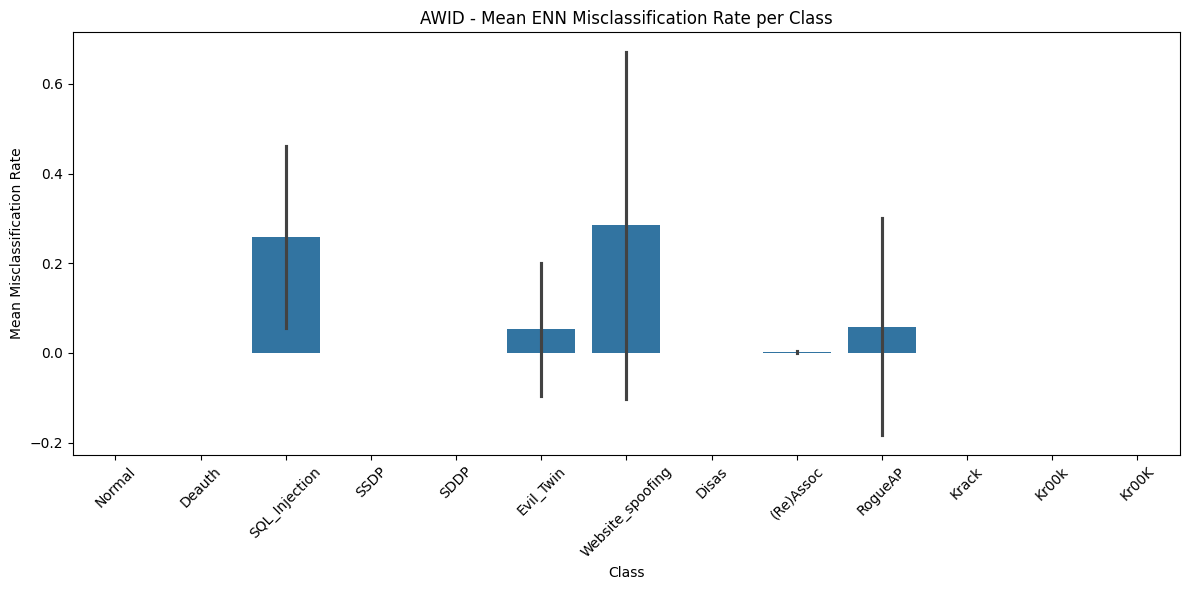

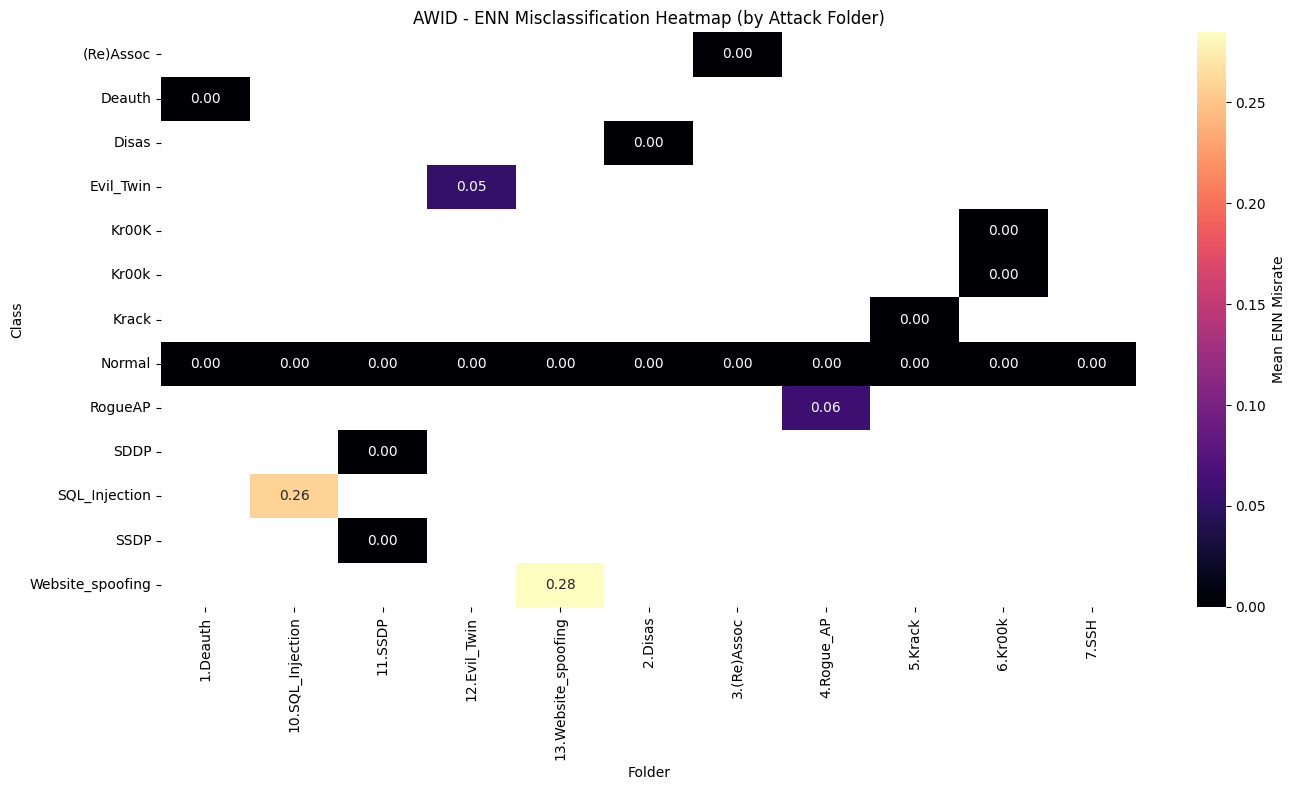

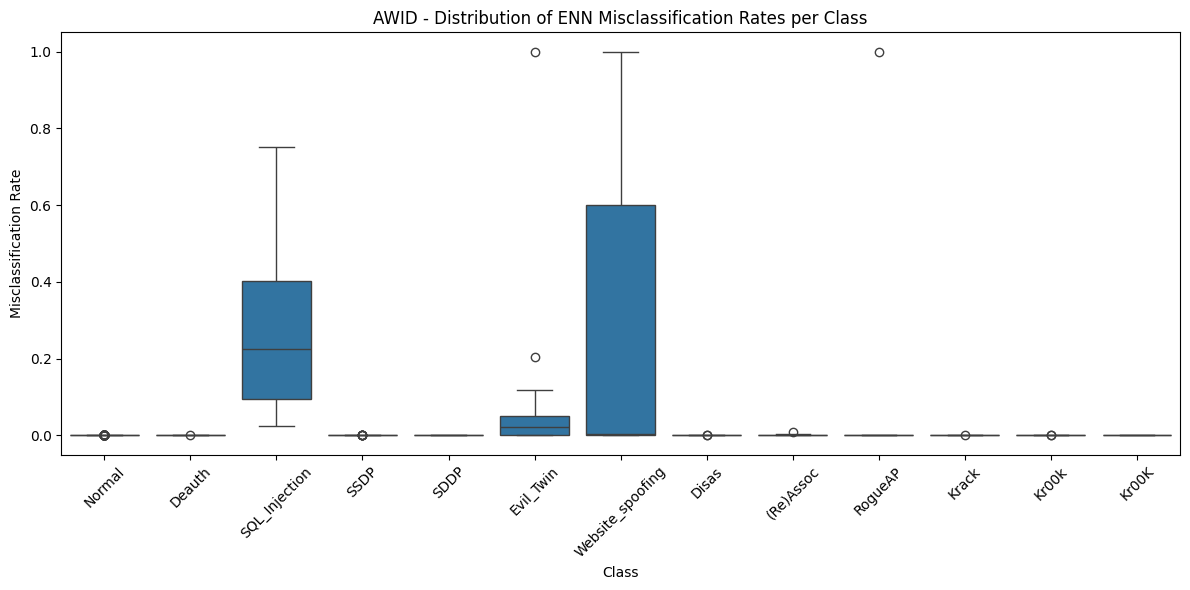

In [10]:

plot_dir = "awid_plots"
os.makedirs(plot_dir, exist_ok=True)


# 1. Mean + Std barplot (ENN misclassification per class)
plt.figure(figsize=(12,6))
sns.barplot(data=summary_df, x="Class", y="ENN_misrate", errorbar="sd")
plt.title("AWID - Mean ENN Misclassification Rate per Class")
plt.ylabel("Mean Misclassification Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "ENN_misrate_barplot.png"), dpi=300)
plt.show()


# 3. Heatmap (Class × Folder)
pivot = summary_df.pivot_table(index="Class", columns="Folder", values="ENN_misrate", aggfunc="mean")

plt.figure(figsize=(14,8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="magma", cbar_kws={'label': 'Mean ENN Misrate'})
plt.title("AWID - ENN Misclassification Heatmap (by Attack Folder)")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "ENN_heatmap.png"), dpi=300)
plt.show()


# 4. Boxplot (distribution across files per class)
plt.figure(figsize=(12,6))
sns.boxplot(data=summary_df, x="Class", y="ENN_misrate")
plt.title("AWID - Distribution of ENN Misclassification Rates per Class")
plt.ylabel("Misclassification Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "ENN_boxplot.png"), dpi=300)
plt.show()
